# 大数据管理作业2-pca

郭英明 2183211376

## homework 1

### import library

In [36]:
import matplotlib.pyplot as plt                 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn import svm
from sklearn.decomposition import PCA 
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from __future__ import print_function 

### load data

In [19]:
data=load_iris()
y=data.target
x=data.data

In [20]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### use pca to deal with original data

In [21]:
pca=PCA(n_components=3)     #加载PCA算法，设置降维后主成分数目为3
reduced_x=pca.fit_transform(x)#对样本进行降维

In [22]:
reduced_x

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

### show the data 

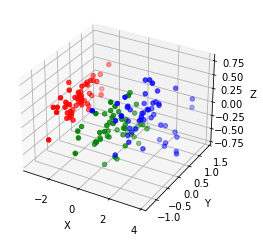

In [23]:
ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
red,green,blue = [],[],[]
for i in range(len(reduced_x)):
    if y[i] == 0:
        red.append(reduced_x[i])
    elif y[i] == 1:
        green.append(reduced_x[i])
    else:
        blue.append(reduced_x[i])

red = np.array(red)
green = np.array(green)
blue = np.array(blue)
ax.scatter(red[:,0], red[:,1], red[:,2], c='r')  # 绘制数据点
ax.scatter(green[:,0], green[:,1], green[:,2], c='g')
ax.scatter(blue[:,0], blue[:,1], blue[:,2], c='b')
ax.set_zlabel('Z')  # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

## homework 2

### 导入数据

In [24]:
digits = load_digits()
X = digits.data
Y = digits.target

### 原始数据

In [25]:
train_data,test_data,train_label,test_label = sklearn.model_selection.train_test_split(X, Y, random_state=1, train_size=0.7,test_size=0.3)

classifier=svm.SVC(C=2,kernel='linear',gamma=10) 
classifier.fit(train_data,train_label.ravel()) 

print("未降维测试集准确率：",classifier.score(test_data,test_label))

未降维测试集准确率： 0.9814814814814815


### pca处理

In [26]:
pca = PCA(n_components=10) 
reduced_X = pca.fit_transform(X)
R_train_data,R_test_data,R_train_label,R_test_label = \
sklearn.model_selection.train_test_split\
(reduced_X, Y, random_state=1, train_size=0.7,test_size=0.3)

classifier.fit(R_train_data,R_train_label.ravel())
print("降维后测试集准确率：",classifier.score(R_test_data,test_label))

降维后测试集准确率： 0.9592592592592593


## homework 3

### 读入图像

In [27]:
origin_image = plt.imread(r'D:/桌面/pca.jpg')


### pca压缩

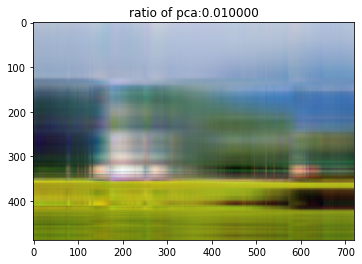

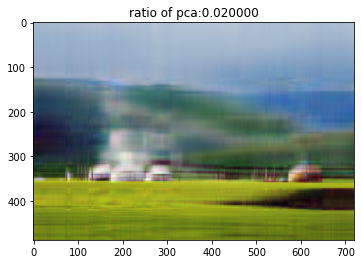

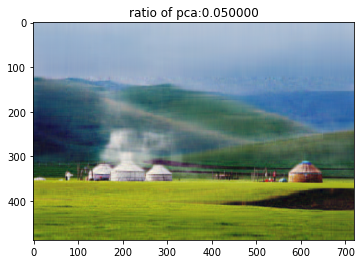

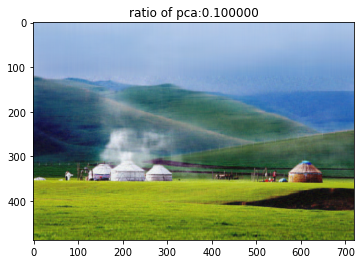

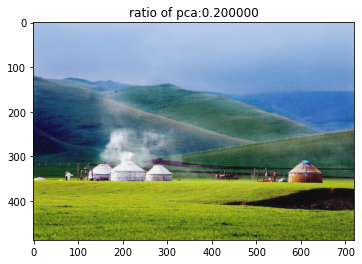

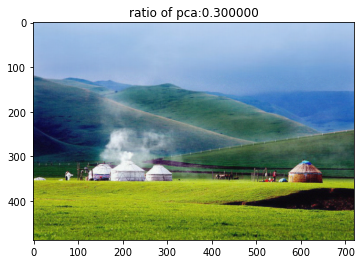

In [28]:
recdata = np.zeros(origin_image.shape)

s = (0.01, 0.02, 0.05, 0.1, 0.2, 0.3)
for n in range(6):
    for i in range(3):
        pca = PCA(n_components= int(origin_image.shape[0]*s[n]))
        pca.fit(origin_image[:,:,i])
        x_new = pca.transform(origin_image[:,:,i])
        recdat = pca.inverse_transform(x_new)
        # 归一化到[0, 1]
        MAX = np.max(recdat)
        MIN = np.min(recdat)
        recdata[:,:,i] = (recdat - MIN) / (MAX - MIN)
    result = np.round(recdata * 255).astype('int')
    plt.title(u'ratio of pca:%f' %  s[n])
    plt.imshow(recdata)
    plt.show()


## homework 4

### 导入数据

In [64]:
lfw_people = fetch_lfw_people(min_faces_per_person=99, resize=0.4)  

### 原始数据

In [65]:
model = svm.SVC()
feature = lfw_people.data
target = lfw_people.target
model.fit(feature,target)
score = model.score(feature,target)
print('the score of svm without pca:%f' % score)

the score of svm without pca:0.948246


### pca

In [70]:
from sklearn.decomposition import PCA as RandomizedPCA
n_samples, h, w = lfw_people.images.shape  
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names  
n_classes = target_names.shape[0] 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.25)
n_components = 150

#pca降维后实现分类
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)
#特征提取
eigenfaces = pca.components_.reshape((n_components, h, w))
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], } 
clf = sklearn.model_selection.GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
#展示PCA结果
print("Predicting people's names on the test set with SVC after using PCA")
y_pred = clf.predict(X_test_pca)
#输出SVC-precision矩阵
print(classification_report(y_test, y_pred, target_names=target_names))

Predicting people's names on the test set with SVC after using PCA
                   precision    recall  f1-score   support

     Colin Powell       0.87      0.84      0.86        64
  Donald Rumsfeld       0.97      0.78      0.86        36
    George W Bush       0.81      0.95      0.87       121
Gerhard Schroeder       0.96      0.81      0.88        27
       Tony Blair       0.93      0.73      0.82        37

         accuracy                           0.86       285
        macro avg       0.91      0.82      0.86       285
     weighted avg       0.87      0.86      0.86       285



### 特征脸

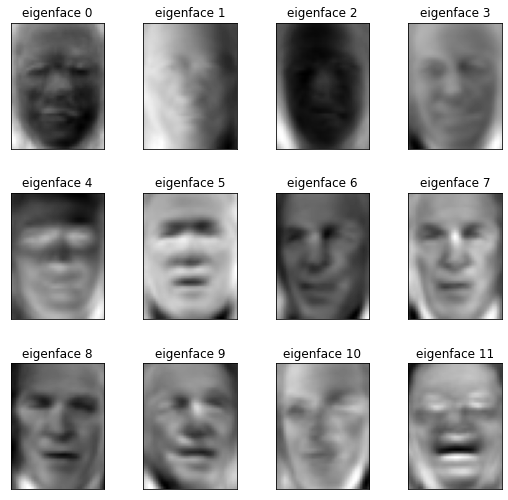

In [71]:
#输出特征脸
#3*4图像输出器
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):  
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))                 
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
#特征脸输出
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)  
plt.show()